# Model Regresi

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("data.csv")
data = data[["Tavg","RH_avg","ff_avg","RR"]]
data

,Tavg,RH_avg,ff_avg,RR
0,28.1,80.0,5.0,21.300000
1,29.7,75.0,6.0,11.408784
2,28.3,78.0,7.0,11.408784
3,29.0,76.0,6.0,11.408784
4,27.8,72.0,10.0,0.300000
...,...,...,...,...
1822,25.2,91.0,3.0,0.300000
1823,25.2,92.0,2.0,26.100000
1824,25.3,94.0,1.0,8.900000
1825,24.9,94.0,2.0,3.200000



Data distribution before handling outliers:
              Tavg       RH_avg       ff_avg           RR
count  1827.000000  1827.000000  1827.000000  1827.000000
mean     27.970324    79.558969     2.019168    11.408784
std       1.138629    12.193390     1.383348    13.976353
min      24.300000    34.000000     0.000000     0.000000
25%      27.200000    74.000000     1.000000     2.200000
50%      28.000000    80.000000     2.000000    11.408784
75%      28.700000    85.000000     2.000000    11.408784
max      32.500000   488.000000    10.000000   208.900000


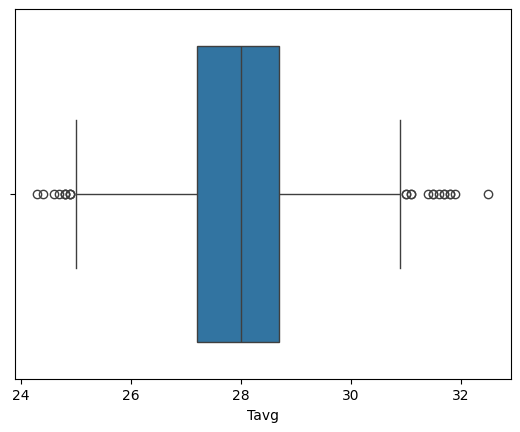

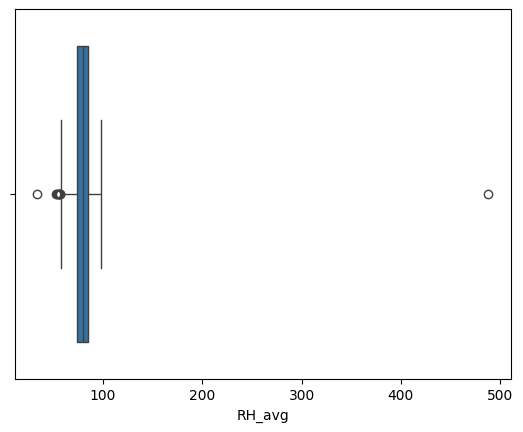

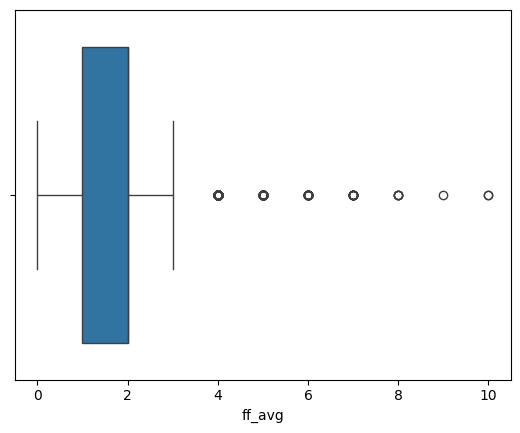

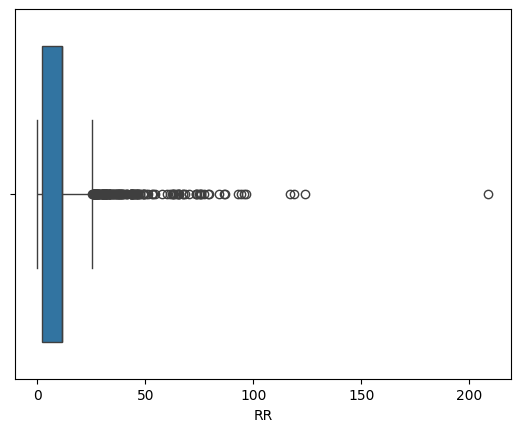

In [2]:
columns = [col for col in data.columns]
# Display the data distribution before handling outliers
print('\nData distribution before handling outliers:')
print(data[columns].describe())

import seaborn as sns
# Memeriksa outliers sekali lagi dengan boxplot
for col in data.columns:
    plt.figure()
    sns.boxplot(x=data[col])
    plt.show()


In [3]:
# List of columns to process
columns = [col for col in data.columns]

# Copy the original DataFrame to avoid modifying it directly
df_load = data.copy()

# Calculate Q1, Q3, and IQR for each column
Q1 = df_load[columns].quantile(0.25)
Q3 = df_load[columns].quantile(0.75)
IQR = Q3 - Q1

# Calculate upper and lower bounds for outliers
maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

# Apply bounds to each column individually
for col in columns:
    df_load[col] = df_load[col].mask(df_load[col] > maximum[col], maximum[col])
    df_load[col] = df_load[col].mask(df_load[col] < minimum[col], minimum[col])

# Display the data distribution after handling outliers
print('\nData distribution after handling outliers:')
print(df_load[columns].describe())



Data distribution after handling outliers:
              Tavg       RH_avg       ff_avg           RR
count  1827.000000  1827.000000  1827.000000  1827.000000
mean     27.967094    79.368219     1.831975     9.592444
std       1.121151     7.503405     0.942318     7.298655
min      24.950000    57.500000     0.000000     0.000000
25%      27.200000    74.000000     1.000000     2.200000
50%      28.000000    80.000000     2.000000    11.408784
75%      28.700000    85.000000     2.000000    11.408784
max      30.950000   101.500000     3.500000    25.221959


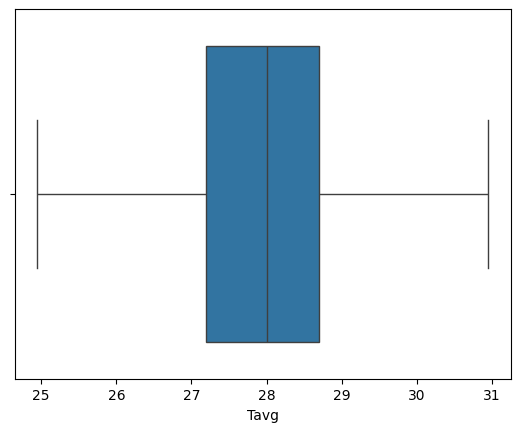

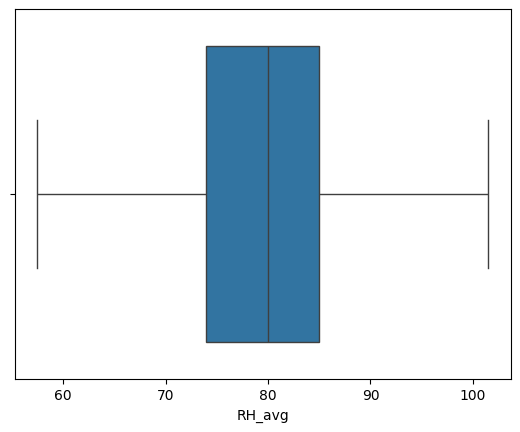

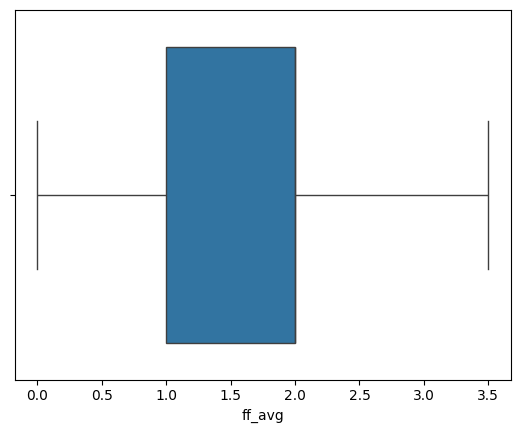

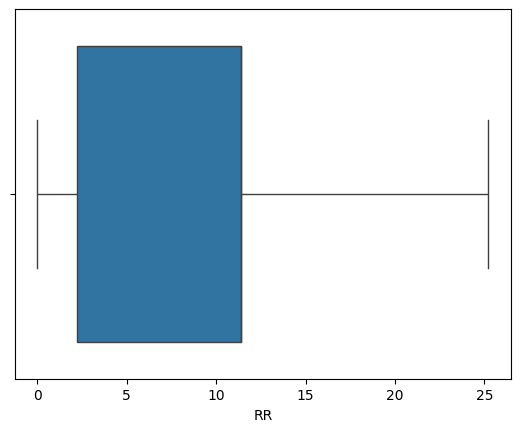

In [4]:
import seaborn as sns
# Memeriksa outliers sekali lagi dengan boxplot
for col in df_load.columns:
    plt.figure()
    sns.boxplot(x=df_load[col])
    plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_encod = df_load.copy()
data_encod = scaler.fit_transform(data_encod)

data_encod

array([[0.525     , 0.51136364, 1.        , 0.84450219],
       [0.79166667, 0.39772727, 1.        , 0.45233535],
       [0.55833333, 0.46590909, 1.        , 0.45233535],
       ...,
       [0.05833333, 0.82954545, 0.28571429, 0.35286711],
       [0.        , 0.82954545, 0.57142857, 0.12687357],
       [0.09166667, 0.82954545, 0.57142857, 0.26960633]])

## Model dengan menggunakan layer Dense

In [120]:
X = data_encod[:,:-1]
y = data_encod[:,-1:]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1224, 3)
(603, 3)
(1224, 1)
(603, 1)


In [7]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128,input_dim=X_train.shape[1], activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               512       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 11393 (44.50 KB)
Trainable params: 11393 (44.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'Adam',
                loss='mse',
                metrics=['mae'])
history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=200,batch_size=32, verbose=1)

Epoch 1/200
39/39 [==============================] - 6s 40ms/step - loss: 0.1179 - mae: 0.2719 - val_loss: 0.0785 - val_mae: 0.2303
Epoch 2/200
39/39 [==============================] - 1s 13ms/step - loss: 0.0823 - mae: 0.2313 - val_loss: 0.0763 - val_mae: 0.2289
Epoch 3/200
39/39 [==============================] - 1s 14ms/step - loss: 0.0817 - mae: 0.2307 - val_loss: 0.0776 - val_mae: 0.2335
Epoch 4/200
39/39 [==============================] - 1s 13ms/step - loss: 0.0823 - mae: 0.2296 - val_loss: 0.0765 - val_mae: 0.2308
Epoch 5/200
39/39 [==============================] - 1s 15ms/step - loss: 0.0816 - mae: 0.2310 - val_loss: 0.0772 - val_mae: 0.2309
Epoch 6/200
39/39 [==============================] - 1s 19ms/step - loss: 0.0822 - mae: 0.2313 - val_loss: 0.0766 - val_mae: 0.2244
Epoch 7/200
39/39 [==============================] - 1s 22ms/step - loss: 0.0814 - mae: 0.2287 - val_loss: 0.0766 - val_mae: 0.2259
Epoch 8/200
39/39 [==============================] - 1s 14ms/step - loss: 0.

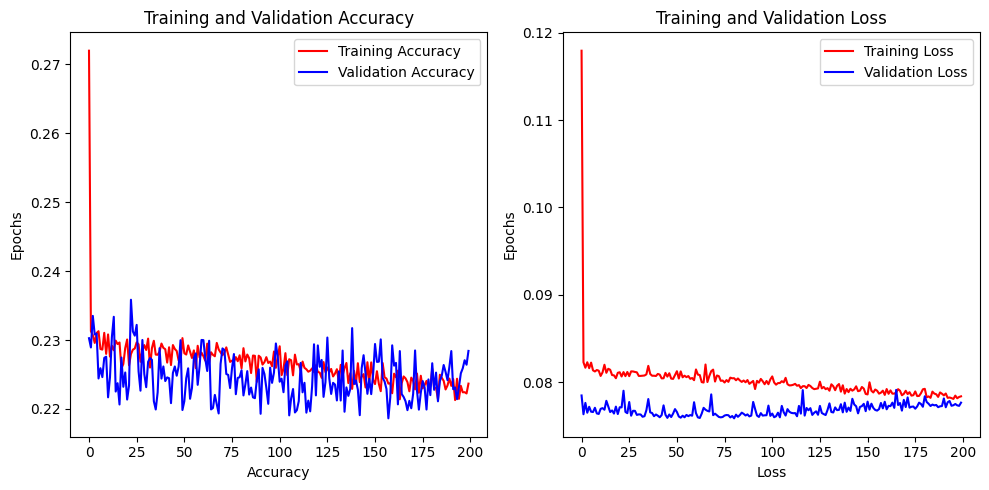

In [9]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['mae']
val_acc = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot Training and Validation Accuracy
axes[0].plot(epochs, acc, 'r', label='Training Accuracy')
axes[0].plot(epochs, val_acc, 'b', label='Validation Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].set_xlabel('Accuracy')
axes[0].set_ylabel('Epochs')
axes[0].legend()

# Plot Training and Validation Loss
axes[1].plot(epochs, loss,  'r', label='Training Loss')
axes[1].plot(epochs, val_loss,  'b', label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Loss')
axes[1].set_ylabel('Epochs')
axes[1].legend()

plt.tight_layout()
plt.show()

In [10]:
# Get predictions for the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE) using tf.keras.metrics
mse = tf.keras.metrics.mean_squared_error(y_test, y_pred)
mae = tf.keras.metrics.mean_absolute_error(y_test, y_pred)

# Calculate the mean of these metrics since they return values for each sample
mse_value = tf.reduce_mean(mse).numpy()
mae_value = tf.reduce_mean(mae).numpy()

print(f"mse: {mse_value}, mae: {mae_value}")


19/19 [==============================] - 1s 5ms/step
mse: 0.08744651079177856, mae: 0.23347795009613037


In [13]:
# Save your model in the SavedModel format
model.save('saved_model/regresi_model_pertama.h5')

# ! tar -czvf saved_model.tar.gz saved_model/

INFO:tensorflow:Assets written to: saved_model/regresi_model_pertama\assets


INFO:tensorflow:Assets written to: saved_model/regresi_model_pertama\assets
tar: : Couldn't visit directory: No such file or directory
tar: Error exit delayed from previous errors.


# Model Kedua

## Model dengan melakukan pengurangan layer

hal ini dilakukan untuk melakukan pengurangan pada model yang overfitting dan tidak stabil

In [ ]:
import tensorflow as tf

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64,input_dim=X_train.shape[1], activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1),
])

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                256       
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model2.compile(optimizer = 'Adam',
                loss='mse',
                metrics=['mae'])
history = model2.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=200,batch_size=32, verbose=1)

Epoch 1/200
39/39 [==============================] - 47s 97ms/step - loss: 0.1158 - mae: 0.2642 - val_loss: 0.0784 - val_mae: 0.2234
Epoch 2/200
39/39 [==============================] - 1s 34ms/step - loss: 0.0836 - mae: 0.2332 - val_loss: 0.0777 - val_mae: 0.2228
Epoch 3/200
39/39 [==============================] - 1s 28ms/step - loss: 0.0820 - mae: 0.2322 - val_loss: 0.0767 - val_mae: 0.2254
Epoch 4/200
39/39 [==============================] - 1s 18ms/step - loss: 0.0809 - mae: 0.2294 - val_loss: 0.0781 - val_mae: 0.2338
Epoch 5/200
39/39 [==============================] - 1s 18ms/step - loss: 0.0814 - mae: 0.2293 - val_loss: 0.0771 - val_mae: 0.2224
Epoch 6/200
39/39 [==============================] - 1s 37ms/step - loss: 0.0812 - mae: 0.2308 - val_loss: 0.0766 - val_mae: 0.2256
Epoch 7/200
39/39 [==============================] - 1s 20ms/step - loss: 0.0811 - mae: 0.2286 - val_loss: 0.0765 - val_mae: 0.2263
Epoch 8/200
39/39 [==============================] - 1s 14ms/step - loss: 0

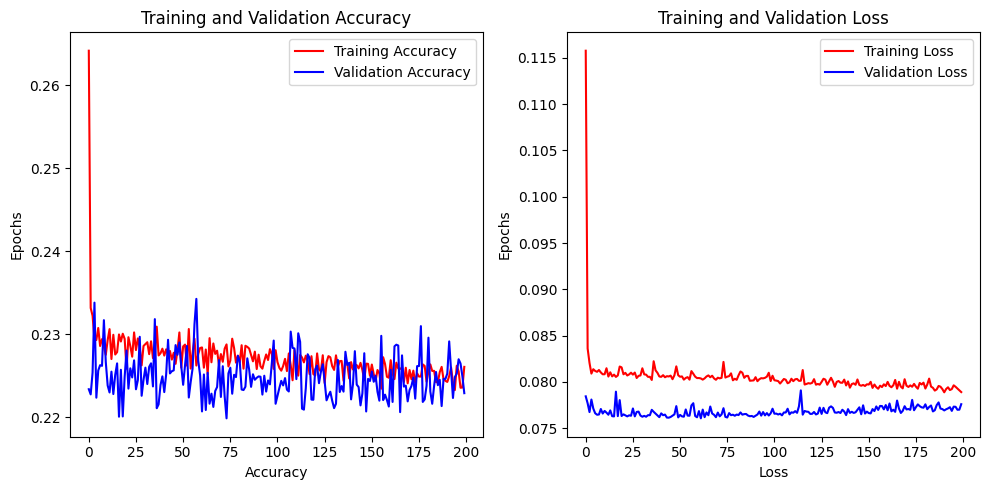

In [27]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['mae']
val_acc = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot Training and Validation Accuracy
axes[0].plot(epochs, acc, 'r', label='Training Accuracy')
axes[0].plot(epochs, val_acc, 'b', label='Validation Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].set_xlabel('Accuracy')
axes[0].set_ylabel('Epochs')
axes[0].legend()

# Plot Training and Validation Loss
axes[1].plot(epochs, loss,  'r', label='Training Loss')
axes[1].plot(epochs, val_loss,  'b', label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Loss')
axes[1].set_ylabel('Epochs')
axes[1].legend()

plt.tight_layout()
plt.show()

In [29]:
# Get predictions for the test data
y_pred = model2.predict(X_test)

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE) using tf.keras.metrics
mse = tf.keras.metrics.mean_squared_error(y_test, y_pred)
mae = tf.keras.metrics.mean_absolute_error(y_test, y_pred)

# Calculate the mean of these metrics since they return values for each sample
mse_value = tf.reduce_mean(mse).numpy()
mae_value = tf.reduce_mean(mae).numpy()

print(f"mse: {mse_value}, mae: {mae_value}")


19/19 [==============================] - 1s 10ms/step
mse: 0.08641204237937927, mae: 0.22766293585300446


In [30]:
# Save your model in the SavedModel format
model2.save('saved_model/regresi_model_kedua.h5')

c:\Users\FIKRY\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Model Ketiga
## Model menggunakan data yang tidak dilakukan pembersihan data data outlier

Hal ini dilakukan untuk mencari model apakah terpengaruh terhadap data yang outlier atau data yang sudah dirapikan

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_encod = data.copy()
data_encod = scaler.fit_transform(data_encod)

data_encod

array([[0.46341463, 0.10132159, 0.5       , 0.10196266],
       [0.65853659, 0.09030837, 0.6       , 0.05461361],
       [0.48780488, 0.0969163 , 0.7       , 0.05461361],
       ...,
       [0.12195122, 0.13215859, 0.1       , 0.04260412],
       [0.07317073, 0.13215859, 0.2       , 0.01531833],
       [0.14634146, 0.13215859, 0.2       , 0.03255146]])

## Menambah Dropout

Pada model kali ini ditambahkan dropout untuk membuat model menjadi lebih stabil

In [ ]:
import tensorflow as tf

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_dim=X_train.shape[1], activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1),
])

model3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 128)               512       
                                                                 
 dropout_23 (Dropout)        (None, 128)               0         
                                                                 
 dense_40 (Dense)            (None, 64)                8256      
                                                                 
 dropout_24 (Dropout)        (None, 64)                0         
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 dropout_25 (Dropout)        (None, 32)                0         
                                                                 
 dense_42 (Dense)            (None, 16)               

In [122]:
def adjust_learning_rate():
    # model = create_uncompiled_model()

    # Define learning rate schedule
    lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 * 10**(epoch / 20))

    # Select the Adam optimizer
    optimizer = tf.keras.optimizers.SGD(momentum=0.9)
    # optimizer = tf.keras.optimizers.Adam()

    # Compile the model with Adam optimizer and Huber loss
    model3.compile(optimizer = optimizer,
                loss=tf.keras.losses.Huber(),
                metrics=['mae'])

    # Train the model with the learning rate schedule
    history = model3.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=100,batch_size=32, verbose=1,callbacks=[lr_schedule])

    return history


In [123]:
# Run the training with dynamic LR
lr_history = adjust_learning_rate()

Epoch 1/100
39/39 [==============================] - 5s 43ms/step - loss: 0.0063 - mae: 0.0881 - val_loss: 0.0051 - val_mae: 0.0745 - lr: 1.0000e-06
Epoch 2/100
39/39 [==============================] - 1s 25ms/step - loss: 0.0062 - mae: 0.0880 - val_loss: 0.0051 - val_mae: 0.0744 - lr: 1.1220e-06
Epoch 3/100
39/39 [==============================] - 1s 23ms/step - loss: 0.0063 - mae: 0.0890 - val_loss: 0.0051 - val_mae: 0.0743 - lr: 1.2589e-06
Epoch 4/100
39/39 [==============================] - 1s 17ms/step - loss: 0.0062 - mae: 0.0879 - val_loss: 0.0051 - val_mae: 0.0742 - lr: 1.4125e-06
Epoch 5/100
39/39 [==============================] - 1s 14ms/step - loss: 0.0062 - mae: 0.0884 - val_loss: 0.0051 - val_mae: 0.0741 - lr: 1.5849e-06
Epoch 6/100
39/39 [==============================] - 1s 14ms/step - loss: 0.0062 - mae: 0.0872 - val_loss: 0.0051 - val_mae: 0.0739 - lr: 1.7783e-06
Epoch 7/100
39/39 [==============================] - 1s 16ms/step - loss: 0.0063 - mae: 0.0876 - val_loss:

Mencari learning_rate diperlukan untuk mencari model yang lebih optimal

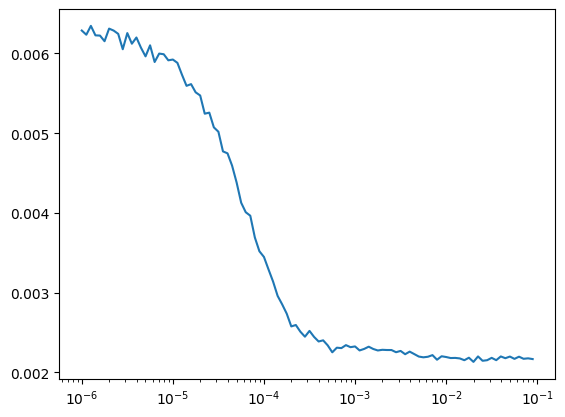

In [ ]:
# Plot the loss for every LR
plt.semilogx(lr_history.history["lr"], lr_history.history["loss"])

In [ ]:
# Select the Adam optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3,momentum=0.9)

# Compile the model with Adam optimizer and Huber loss
model3.compile(optimizer = optimizer,
            loss=tf.keras.losses.Huber(),
            metrics=['mae'])

history = model3.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=200,batch_size=32, verbose=1)

Epoch 1/200
39/39 [==============================] - 4s 20ms/step - loss: 0.0038 - mae: 0.0585 - val_loss: 0.0026 - val_mae: 0.0381
Epoch 2/200
39/39 [==============================] - 0s 8ms/step - loss: 0.0031 - mae: 0.0509 - val_loss: 0.0025 - val_mae: 0.0367
Epoch 3/200
39/39 [==============================] - 0s 8ms/step - loss: 0.0029 - mae: 0.0495 - val_loss: 0.0025 - val_mae: 0.0376
Epoch 4/200
39/39 [==============================] - 0s 8ms/step - loss: 0.0027 - mae: 0.0492 - val_loss: 0.0025 - val_mae: 0.0378
Epoch 5/200
39/39 [==============================] - 0s 8ms/step - loss: 0.0027 - mae: 0.0486 - val_loss: 0.0025 - val_mae: 0.0376
Epoch 6/200
39/39 [==============================] - 1s 16ms/step - loss: 0.0028 - mae: 0.0493 - val_loss: 0.0025 - val_mae: 0.0376
Epoch 7/200
39/39 [==============================] - 0s 11ms/step - loss: 0.0027 - mae: 0.0481 - val_loss: 0.0025 - val_mae: 0.0368
Epoch 8/200
39/39 [==============================] - 1s 16ms/step - loss: 0.0027

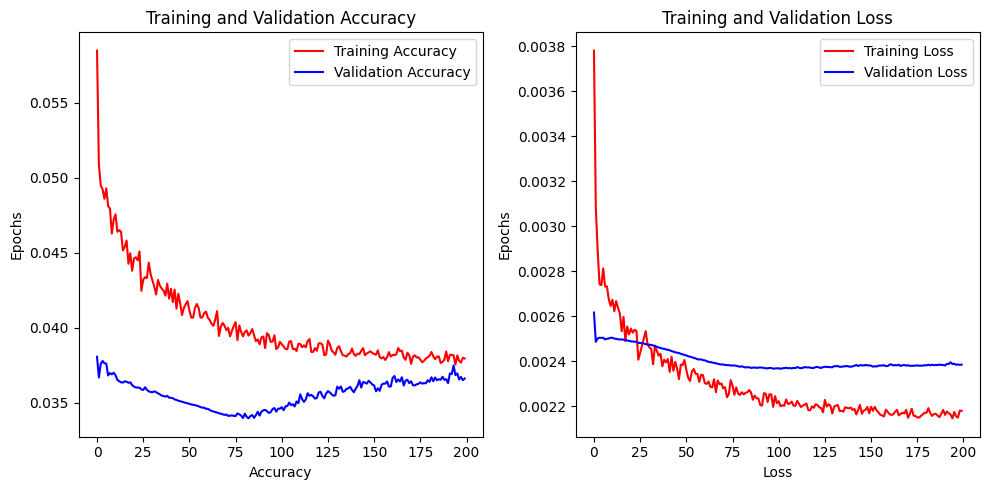

In [132]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['mae']
val_acc = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot Training and Validation Accuracy
axes[0].plot(epochs, acc, 'r', label='Training Accuracy')
axes[0].plot(epochs, val_acc, 'b', label='Validation Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].set_xlabel('Accuracy')
axes[0].set_ylabel('Epochs')
axes[0].legend()

# Plot Training and Validation Loss
axes[1].plot(epochs, loss,  'r', label='Training Loss')
axes[1].plot(epochs, val_loss,  'b', label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Loss')
axes[1].set_ylabel('Epochs')
axes[1].legend()

plt.tight_layout()
plt.show()

In [133]:
# Get predictions for the test data
y_pred = model3.predict(X_train)

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE) using tf.keras.metrics
mse = tf.keras.metrics.mean_squared_error(y_train, y_pred)
mae = tf.keras.metrics.mean_absolute_error(y_train, y_pred)

# Calculate the mean of these metrics since they return values for each sample
mse_value = tf.reduce_mean(mse).numpy()
mae_value = tf.reduce_mean(mae).numpy()

print(f"mse: {mse_value}, mae: {mae_value}")


39/39 [==============================] - 1s 23ms/step
mse: 0.00429827393963933, mae: 0.03781253099441528


In [149]:
# Save your model in the SavedModel format
model3.save('saved_model/regresi_model_ketiga.h5')

c:\Users\FIKRY\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Pengetesan Model pada data selain data training dan testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_eval = pd.read_excel("data 2012-2017.xlsx")
data_eval = data_eval[["Tavg","RH_avg","ff_avg","RR"]]
data_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tavg    1607 non-null   float64
 1   RH_avg  1613 non-null   float64
 2   ff_avg  1684 non-null   float64
 3   RR      1378 non-null   float64
dtypes: float64(4)
memory usage: 57.2 KB


In [2]:
data_dropna = data_eval.copy()
data_dropna = data_dropna.dropna().reset_index(drop=True)
data_dropna.info()                             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tavg    1340 non-null   float64
 1   RH_avg  1340 non-null   float64
 2   ff_avg  1340 non-null   float64
 3   RR      1340 non-null   float64
dtypes: float64(4)
memory usage: 42.0 KB


In [3]:
for col in data_dropna.columns:
    print("9999")
    print(col,data_dropna[data_dropna[col] == 9999 ].shape[0])
    print("8888")
    print(col,data_dropna[data_dropna[col] == 8888 ].shape[0])
    print("---------------------------")

9999
Tavg 0
8888
Tavg 0
---------------------------
9999
RH_avg 0
8888
RH_avg 0
---------------------------
9999
ff_avg 0
8888
ff_avg 0
---------------------------
9999
RR 0
8888
RR 64
---------------------------


In [4]:
data_dropna = data_dropna[data_dropna["RR"] != 8888 ]
print("RR",data_dropna[data_dropna["RR"] == 8888 ].shape[0])
data_dropna.info()

RR 0
<class 'pandas.core.frame.DataFrame'>
Index: 1276 entries, 0 to 1339
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tavg    1276 non-null   float64
 1   RH_avg  1276 non-null   float64
 2   ff_avg  1276 non-null   float64
 3   RR      1276 non-null   float64
dtypes: float64(4)
memory usage: 49.8 KB


In [8]:
data_encod_2nd = data_dropna.copy()
data_encod_2nd = scaler.transform(data_encod_2nd)

data_encod_2nd

array([[2.19512195e-01, 1.16740088e-01, 1.00000000e-01, 5.26567736e-03],
       [2.31707317e-01, 1.18942731e-01, 0.00000000e+00, 2.35519387e-01],
       [2.92682927e-01, 1.18942731e-01, 1.00000000e-01, 4.40402106e-02],
       ...,
       [3.65853659e-01, 9.91189427e-02, 3.00000000e-01, 3.35088559e-03],
       [5.73170732e-01, 9.25110132e-02, 5.00000000e-01, 4.78697942e-04],
       [7.31707317e-02, 1.32158590e-01, 5.00000000e-01, 2.87218765e-02]])

In [9]:
X_eval = data_encod_2nd[:,:-1]
y_eval = data_encod_2nd[:,-1:]

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the model
model = load_model(r"C:\Users\FIKRY\program_fina\saved_model\regresi_model_ketiga.h5")    

# Get predictions for the test data
y_pred = model.predict(X_eval)

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE) using tf.keras.metrics
mse = tf.keras.metrics.mean_squared_error(y_eval, y_pred)
mae = tf.keras.metrics.mean_absolute_error(y_eval, y_pred)

# Calculate the mean of these metrics since they return values for each sample
mse_value = tf.reduce_mean(mse).numpy()
mae_value = tf.reduce_mean(mae).numpy()

print(f"mse: {mse_value}, mae: {mae_value}")

40/40 [==============================] - 1s 12ms/step
mse: 0.00593815790489316, mae: 0.0608200803399086


In [11]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the model
model = load_model(r"C:\Users\FIKRY\program_fina\saved_model\regresi_model_pertama.h5")    

# Get predictions for the test data
y_pred = model.predict(X_eval)

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE) using tf.keras.metrics
mse = tf.keras.metrics.mean_squared_error(y_eval, y_pred)
mae = tf.keras.metrics.mean_absolute_error(y_eval, y_pred)

# Calculate the mean of these metrics since they return values for each sample
mse_value = tf.reduce_mean(mse).numpy()
mae_value = tf.reduce_mean(mae).numpy()

print(f"mse: {mse_value}, mae: {mae_value}")

40/40 [==============================] - 5s 33ms/step
mse: 0.06672009080648422, mae: 0.2451939582824707


In [12]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the model
model = load_model(r"C:\Users\FIKRY\program_fina\saved_model\regresi_model_kedua.h5")    

# Get predictions for the test data
y_pred = model.predict(X_eval)

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE) using tf.keras.metrics
mse = tf.keras.metrics.mean_squared_error(y_eval, y_pred)
mae = tf.keras.metrics.mean_absolute_error(y_eval, y_pred)

# Calculate the mean of these metrics since they return values for each sample
mse_value = tf.reduce_mean(mse).numpy()
mae_value = tf.reduce_mean(mae).numpy()

print(f"mse: {mse_value}, mae: {mae_value}")

40/40 [==============================] - 3s 24ms/step
mse: 0.10539612919092178, mae: 0.30413058400154114
